# Figures for "Using Neural Networks to Identify Bird Species from Birdsong Samples"

March 8, 2019

This notebook contains code for generating the figures in the book chapter "Using Neural Networks to Identify Bird Species from Birdsong Samples" by Russell Houpt, Mark Pearson, Paul Pearson, Taylor Rink, Sarah Seckler, Darin Stephenson, and Allison VanderStoep. This work was done at Hope College between 2016 and 2018.

This notebook must be run in an anaconda environment that has tensorflow, keras, scipy, numpy, matplotlib,... installed.  Let's suppose we have an anaconda environment with these packages installed named `tf-conda-cpu`.  At the terminal command prompt, run the following to open this notebook:

- `conda env list`
- `source activate tf-conda-cpu`
- `jupyter notebook`

First, we load some useful packages and options.

In [1]:
%pylab inline
from scipy import signal
import scipy.io.wavfile as wav
from scipy.integrate import quad
from matplotlib.colors import ListedColormap

Populating the interactive namespace from numpy and matplotlib


## Figure 1

12000
45010


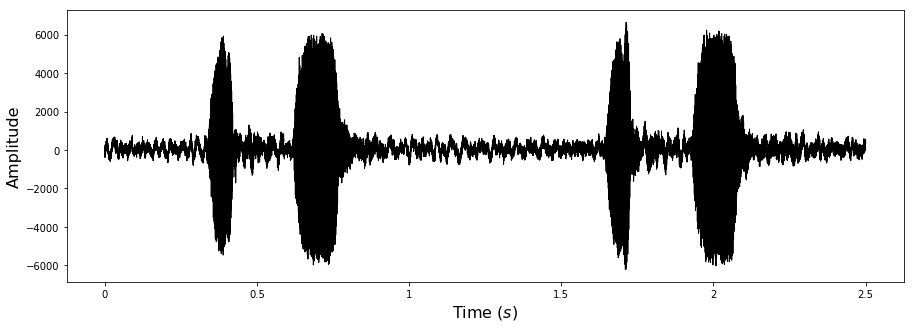

In [2]:
samplerate, s = wav.read('cuckoo_call1.wav')
print(samplerate) # unfortunately, this clip has a non-standard sample rate of 12,000 (not 44100).
print(len(s))

font_dict = {'family': 'sans', 'color': 'black', 'weight': 'normal', 'size': 16 }
alignment = {'horizontalalignment': 'center', 'verticalalignment': 'baseline' }

myfig = plt.figure(figsize=(15,5))

plt.plot(s[0:30000], color='black', linewidth=1.0)
plt.xticks([0,6000,12000,18000,24000,30000], ('0', '0.5', '1', '1.5', '2','2.5'))
plt.xlabel('Time ($s$)', fontdict=font_dict)
plt.ylabel('Amplitude', fontdict=font_dict)
plt.show()

myfig.savefig("cuckoo-signal.pdf", bbox_inches='tight')
myfig.savefig("cuckoo-signal.png", bbox_inches='tight')

## Figure 2

In [3]:
def make_scalogram(s,samplerate,min=3,J=66,dj=0.125,omega0=8.0,pooling=1,min_time=4):
    # s = signal
    s0 = 2
    v = J+1-min
    scales = s0 * 2 ** (dj * np.arange(min, J + 1)) # = sj
    num_scales = len(scales)
    #samplerate, s = wav.read(filename)
    s_length = len(s)
    #while len(s) < min_time*samplerate:
    #    s = np.append(s,s)
    #    s_length = len(s)
    scalogram = np.zeros( (num_scales, s_length), dtype=np.complex)
    for ind, scale in enumerate(scales):
        M = int(10.0 * scale)

        tt = np.arange( (-M+1.0)/2.0, (M+1.0)/2.0 ) 

        x = tt / scale
        psi_Morlet  = np.exp(1j * omega0 * x) 
        psi_Morlet -= np.exp(-0.5 * (omega0)**2)
        psi_Morlet *= np.exp(-0.5 * (x**2)) * np.pi**(-0.25)
        norm = 1/scale # in Summer 2017, we used np.sqrt( 1.0 / scale )
        scalogram[ind,:] = norm*signal.fftconvolve(s, psi_Morlet, mode='same')
    if pooling > 1:
        scalogram = maxpool_scalogram(scalogram,c=pooling)
    power = (np.absolute(scalogram))**2
    times = np.linspace(0,s_length/samplerate,s_length)
    freqs = samplerate * omega0 / (2*np.pi*scales)
    return power, times, freqs

/home/paul/.local/lib/python3.6/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


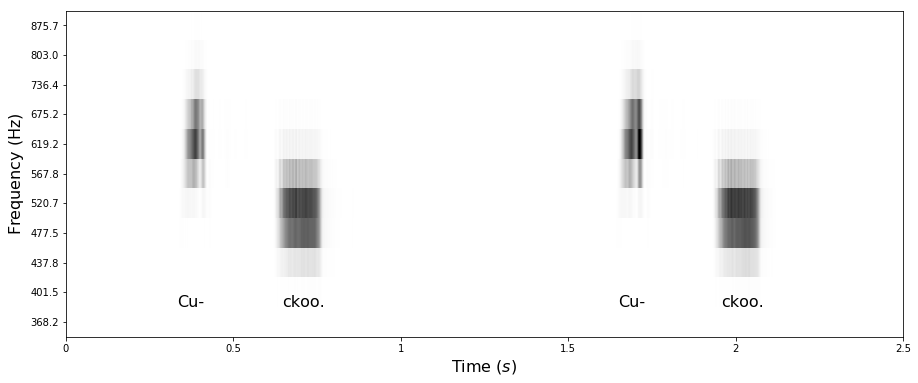

In [4]:
scal, times, freqs = make_scalogram(s[0:30000],samplerate)

freqs = np.around(freqs,decimals=1)

myfig = plt.figure(figsize =(15,6))

font_dict = {'family': 'sans', 'color': 'black', 'weight': 'normal', 'size': 16 }
alignment = {'horizontalalignment': 'center', 'verticalalignment': 'baseline' }

plt.grid(False)
plt.imshow(scal[22:33,0:30000], aspect='auto', cmap='Greys')
plt.xticks([0,6000,12000,18000,24000,30000], ('0', '0.5', '1', '1.5', '2','2.5'))
plt.yticks(range(0,11),freqs[22:33])
plt.xlabel('Time ($s$)', fontdict=font_dict)
plt.ylabel('Frequency ($\mathrm{Hz}$)', fontdict=font_dict)
plt.text(4000, 9.5,  'Cu-', fontdict=font_dict)
plt.text(7750, 9.5,  'ckoo.', fontdict=font_dict)
plt.text(19800, 9.5,  'Cu-', fontdict=font_dict)
plt.text(23500, 9.5,  'ckoo.', fontdict=font_dict)
plt.show()

myfig.savefig("cuckoo-scalogram.pdf", bbox_inches='tight')
myfig.savefig("cuckoo-scalogram.png", bbox_inches='tight')

## Figure 3

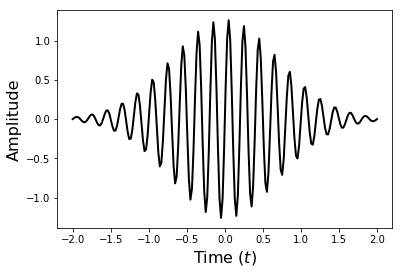

In [5]:
myfig = plt.figure()

font_dict = {'family': 'sans', 'color': 'black', 'weight': 'normal', 'size': 16 }
alignment = {'horizontalalignment': 'center', 'verticalalignment': 'baseline' }

k = np.sqrt(1.0/0.626657)
t = np.linspace(-2,2,200)
psi = k*np.sin(10*np.pi*t) * np.exp(-t**2)
plt.plot(t, psi, color='black', linewidth=2.0)
plt.xlabel('Time ($t$)', fontdict=font_dict)
plt.ylabel('Amplitude', fontdict=font_dict)
plt.show()

myfig.savefig("basic-wavelet.pdf", bbox_inches='tight')
myfig.savefig("basic-wavelet.png", bbox_inches='tight')

## Figure 4

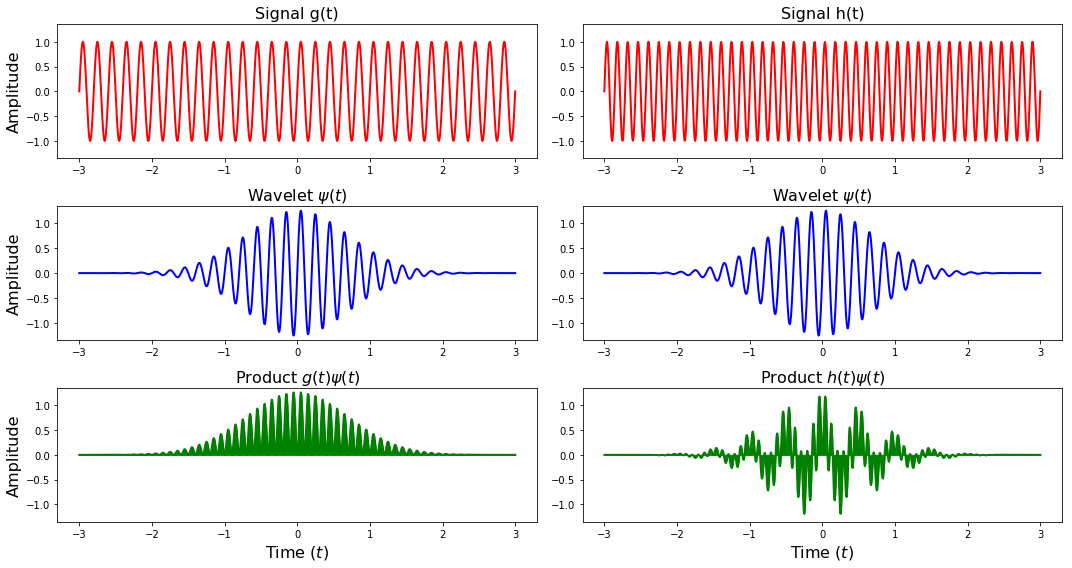

In [6]:
myfig = plt.figure(figsize =(15,8))

font_dict = {'family': 'sans', 'color': 'black', 'weight': 'normal', 'size': 16 }
alignment = {'horizontalalignment': 'center', 'verticalalignment': 'baseline' }

t = np.linspace(-3, 3, 1000)
g = np.sin(10*np.pi*t)
h = np.sin(14*np.pi*t)

k = np.sqrt(1.0/0.626657)
psi = k*np.exp(-1*t**2)*sin(10*np.pi*t)

plt.subplot(3, 2, 1)
plt.plot(t, g, linewidth=2, color='red')
plt.title('Signal g(t)', fontdict=font_dict)
plt.ylim(-1.35,1.35)
plt.ylabel('Amplitude', fontdict=font_dict)

plt.subplot(3, 2, 2)
plt.plot(t, h, linewidth=2, color='red')
plt.title('Signal h(t)', fontdict=font_dict)
plt.ylim(-1.35,1.35)

plt.subplot(3, 2, 3)
plt.plot(t, psi, linewidth=2, color='blue')
plt.title('Wavelet $\psi(t)$', fontdict=font_dict)
plt.ylim(-1.35,1.35)
plt.ylabel('Amplitude', fontdict=font_dict)

plt.subplot(3, 2, 4)
plt.plot(t, psi, linewidth=2, color='blue')
plt.title('Wavelet $\psi(t)$', fontdict=font_dict)
plt.ylim(-1.35,1.35)

plt.subplot(3, 2, 5)
plt.fill_between(t, 0, g*psi, color='green')
plt.plot(t, g*psi, linewidth=2, color='green')
plt.title('Product $g(t) \psi(t)$', fontdict=font_dict)
plt.ylim(-1.35,1.35)
plt.xlabel('Time ($t$)', fontdict=font_dict)
plt.ylabel('Amplitude', fontdict=font_dict)

plt.subplot(3, 2, 6)
plt.fill_between(t, 0, h*psi, color='green')
plt.plot(t, h*psi, linewidth=2, color='green')
plt.title('Product $h(t) \psi(t)$', fontdict=font_dict)
plt.ylim(-1.35,1.35)
plt.xlabel('Time ($t$)', fontdict=font_dict)

plt.tight_layout()
plt.show()

myfig.savefig("xcor-example-gh.pdf", bbox_inches='tight')
myfig.savefig("xcor-example-gh.png", bbox_inches='tight')

## Figure 5

1.2632375563475349
[1.11940318]
[-1.51864891e-17]


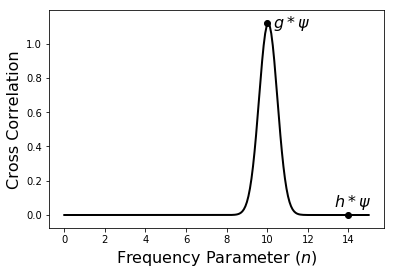

In [7]:
myfig = plt.figure()

font_dict = {'family': 'sans', 'color': 'black', 'weight': 'normal', 'size': 16 }
alignment = {'horizontalalignment': 'center', 'verticalalignment': 'baseline' }

# First, we find the value of k for the Morlet wavelet with \omega_0 = 2\pi.
# Solve for k: 
# \int_{-\inf}^{\inf} | k e^{-t^2} \sin(10\pi t)|^2 dt = 1, 
# k = \sqrt{ 1 / \int_{-\inf}^{\inf} |e^{-t^2} \sin(10\pi t)|^2 dt }

def k_integrand(t):
    return (np.exp(-1*t**2) * np.sin(10*np.pi*t))**2
   
k = np.sqrt( 1 / quad(k_integrand, -1*np.inf, np.inf)[0] )
print(k)

a = -10
b = 10
num_samples = 10000
t = np.linspace(a,b,num_samples)
psi = k*np.sin(10*np.pi*t) * np.exp(-1*t**2)
g = np.sin(10*np.pi*t)
gxcor = np.correlate(g,psi) * (b-a)/num_samples
print( gxcor )
h = np.sin(14*np.pi*t)
hxcor = np.correlate(h,psi) * (b-a)/num_samples
print( hxcor )

xcor = []
for n in range(0,201):
    N = 15.0 * n/201
    xcor.append( np.correlate( np.sin(N*np.pi*t), psi )[0] * (b-a)/num_samples )

n = np.linspace(0,15,201)

plt.plot(n, xcor, color='black', linewidth=2.0)
plt.xlabel('Frequency Parameter ($n$)', fontdict=font_dict)
plt.ylabel('Cross Correlation', fontdict=font_dict)
plt.scatter([10,14],[gxcor,hxcor],marker = 'o',color='black')
plt.text(10+0.3, gxcor-0.025,  r'$g * \psi$', fontdict=font_dict)
plt.text(14+0.2, hxcor+0.05,  r'$h * \psi$', fontdict=font_dict, **alignment)
plt.show()

myfig.savefig("xcor-response-curve.pdf", bbox_inches='tight')
myfig.savefig("xcor-response-curve.png", bbox_inches='tight')

## Figure 6

1.2632375563475349
0.0
1.119515135231544


/home/paul/.local/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


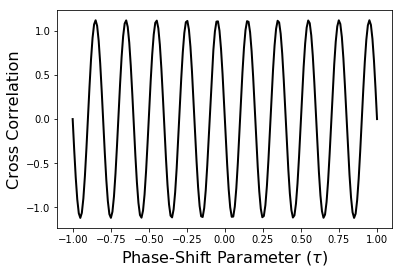

In [8]:
myfig = plt.figure()

font_dict = {'family': 'sans', 'color': 'black', 'weight': 'normal', 'size': 16 }
alignment = {'horizontalalignment': 'center', 'verticalalignment': 'baseline' }

# First, we find the value of k for the Morlet wavelet with \omega_0 = 2\pi.
# Solve for k: 
# \int_{-\inf}^{\inf} | k e^{-t^2} \sin(10\pi t)|^2 dt = 1, 
# k = \sqrt{ 1 / \int_{-\inf}^{\inf} |e^{-t^2} \sin(10\pi t)|^2 dt }

def k_integrand(t):
    return (np.exp(-1*t**2) * np.sin(10*np.pi*t))**2
   
k = np.sqrt( 1 / quad(k_integrand, -1*np.inf, np.inf)[0] )
print(k)

def integrand(t,tau):
    return np.cos(10*np.pi*t) * k*np.sin(10*np.pi*(t-tau)) * np.exp(-1*(t-tau)**2)

def convolve(tau):
    return quad(integrand, -1*np.inf, np.inf, args=(tau))[0]

print(convolve(0))
print(convolve(0.15))

convolve_vectorized = np.vectorize(convolve)

tau = np.linspace(-1,1,200)
cv = convolve_vectorized(tau)

plt.plot(tau, cv, color='black', linewidth=2.0)
plt.xlabel(r'Phase-Shift Parameter ($\tau$)', fontdict=font_dict)
plt.ylabel('Cross Correlation', fontdict=font_dict)
plt.show()

myfig.savefig("xcor-phase-shift.pdf", bbox_inches='tight')
myfig.savefig("xcor-phase-shift.png", bbox_inches='tight')

## Figure 7

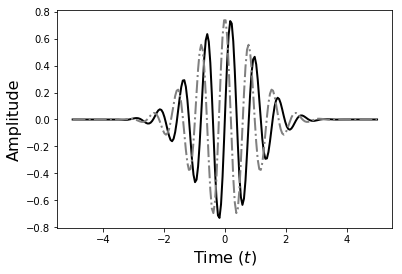

In [9]:
myfig = plt.figure()

font_dict = {'family': 'sans', 'color': 'black', 'weight': 'normal', 'size': 16 }
alignment = {'horizontalalignment': 'center', 'verticalalignment': 'baseline' }

omega0 = 8.0
K = np.sqrt(1.0/1.77245)
t = np.linspace(-5,5,200)
Re_z = K*np.sin(omega0*t) * np.exp(-0.5*t**2)
Im_z = K*np.cos(omega0*t) * np.exp(-0.5*t**2)
plt.plot(t, Re_z, color='black', linewidth=2.0)
plt.plot(t, Im_z, '-.', color='gray', linewidth=2.0)
#plt.text(-2/3+0.1, 4-0.1, r'$u_1=0$')

plt.xlabel('Time ($t$)', fontdict=font_dict)
plt.ylabel('Amplitude', fontdict=font_dict)
plt.show()

myfig.savefig("Morlet-dash.pdf", bbox_inches='tight')
myfig.savefig("Morlet-dash.png", bbox_inches='tight')

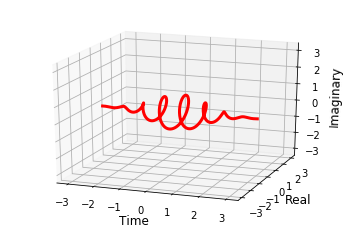

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `Complex-Morlet-3d-omega8-crop.pdf'.


In [10]:
#import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
#import numpy as np
#import matplotlib.pyplot as plt

#mpl.rcParams['legend.fontsize'] = 12

font_dict = {'family': 'sans', 'color': 'black', 'weight': 'normal', 'size': 12 }
alignment = {'horizontalalignment': 'center', 'verticalalignment': 'baseline' }

omega0 = 8.0
t = np.linspace(-3,3,800)
morlet_real = np.cos(omega0*t) * np.exp(-0.5*t**2)
morlet_imag = np.sin(omega0*t) * np.exp(-0.5*t**2)

#fig = plt.figure(figsize=plt.figaspect(0.5)*1.5) # set aspect ratio
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(t, morlet_real, morlet_imag, c=(1,0,0), linewidth=3)

ax.set_xlabel('Time', fontdict=font_dict)
ax.set_ylabel('Real', fontdict=font_dict)
ax.set_zlabel('Imaginary', fontdict=font_dict)

# set aspect ratio to 1:1:1
def axisEqual3D(ax):
    extents = np.array([getattr(ax, 'get_{}lim'.format(dim))() for dim in 'xyz'])
    sz = extents[:,1] - extents[:,0]
    centers = np.mean(extents, axis=1)
    maxsize = max(abs(sz))
    r = maxsize/2
    for ctr, dim in zip(centers, 'xyz'):
        getattr(ax, 'set_{}lim'.format(dim))(ctr - r, ctr + r)
axisEqual3D(ax)

ax.view_init(azim=-70., elev=20.) # nice profile
#plt.title('Complex Morlet Wavelet (in R x C)')

plt.savefig('Complex-Morlet-3d-omega8.pdf', bbox_inches='tight')
plt.savefig('Complex-Morlet-3d-omega8.png', bbox_inches='tight')

plt.show()

# crop the pdf file
!pdfcrop Complex-Morlet-3d-omega8.pdf Complex-Morlet-3d-omega8-crop.pdf

## Figure 8

0.7511255444649425


/home/paul/.local/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


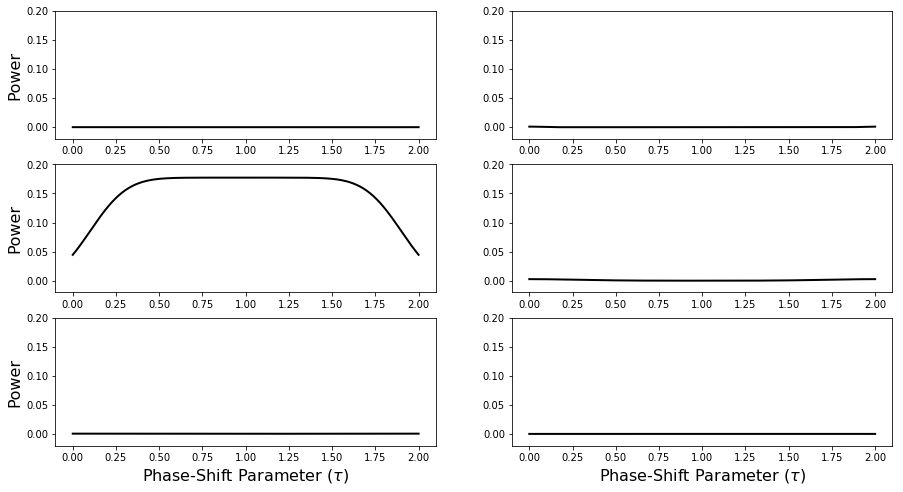

In [11]:
# First, we find the value of k for the Morlet wavelet with \omega_0 = 2\pi.
# Solve for k: 
# \int_{-\inf}^{\inf} | k e^{-t^2 / 2} \cos(2\pi t) + i \sin(2\pi t)|^2 dt = 1,
# k^2 \int_{-\inf}^{\inf} |e^{-t^2/2}|^2 dt = 1,
# k = \sqrt{ 1 / \int_{-\inf}^{\inf} |e^{-t^2/2}|^2 dt }

def k_integrand(t):
    return (np.exp(-0.5*t**2))**2
   
k = np.sqrt( 1 / quad(k_integrand, -1*np.inf, np.inf)[0] )
print(k)


# Second, compute the convolution using numerical integration (no need to optimize for speed here)
# See:  https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html

def Re_integrand(t,tau,s):
    if t <= 0:
        return 0
    elif t >= 2:
        return 0
    else:
        return np.sin(10*np.pi*t) * k / np.sqrt(s) * (np.cos(2*np.pi*(t-tau)/s)) * np.exp(-0.5*((t-tau)/s)**2)

def Im_integrand(t,tau,s):
    if t <= 0:
        return 0
    elif t >= 2:
        return 0
    else:
        return np.sin(10*np.pi*t) * k / np.sqrt(s) * (np.sin(2*np.pi*(t-tau)/s)) * np.exp(-0.5*((t-tau)/s)**2)

def Re_convolve(tau,s):
    return quad(Re_integrand, -1*np.inf, np.inf, args=(tau,s))[0]

def Im_convolve(tau,s):
    return quad(Im_integrand, -1*np.inf, np.inf, args=(tau,s))[0]

#print(Re_convolve(0, 1/5)) # returns a number
#print(Im_convolve(0, 1/5)) # returns a number

Re_convolve_vectorized = np.vectorize(Re_convolve)
Im_convolve_vectorized = np.vectorize(Im_convolve)

tau = np.linspace(0,2,400)

#Re_cv = Re_convolve_vectorized(tau, 1/5) # returns a vector of numbers
#Im_cv = Im_convolve_vectorized(tau, 1/5) # returns a vector of numbers

def power_unnormalized(tau,s):
    # should have a factor of 1/s in there for normalization, but we omit normalization
    return (Re_convolve_vectorized(tau,s))**2 + (Im_convolve_vectorized(tau,s))**2


# Third, generate the figure

myfig = plt.figure(figsize =(15,8))

font_dict = {'family': 'sans', 'color': 'black', 'weight': 'normal', 'size': 16 }
alignment = {'horizontalalignment': 'center', 'verticalalignment': 'baseline' }

plt.subplot(3, 2, 1)
plt.plot(tau, power_unnormalized(tau,1/20), linewidth=2, color='black')
#plt.xlabel(r'Phase-Shift Parameter ($\tau$)', fontdict=font_dict)
plt.ylabel('Power', fontdict=font_dict)
plt.ylim(-0.02,0.2)

plt.subplot(3, 2, 2)
plt.plot(tau, power_unnormalized(tau,1/10), linewidth=2, color='black')
#plt.xlabel(r'Phase-Shift Parameter ($\tau$)', fontdict=font_dict)
#plt.ylabel('Power', fontdict=font_dict)
plt.ylim(-0.02,0.2)

plt.subplot(3, 2, 3)
plt.plot(tau, power_unnormalized(tau,1/5), linewidth=2, color='black')
#plt.xlabel(r'Phase-Shift Parameter ($\tau$)', fontdict=font_dict)
plt.ylabel('Power', fontdict=font_dict)
plt.ylim(-0.02,0.2)

plt.subplot(3, 2, 4)
plt.plot(tau, power_unnormalized(tau,2/5), linewidth=2, color='black')
#plt.xlabel(r'Phase-Shift Parameter ($\tau$)', fontdict=font_dict)
#plt.ylabel('Power', fontdict=font_dict)
plt.ylim(-0.02,0.2)

plt.subplot(3, 2, 5)
plt.plot(tau, power_unnormalized(tau,4/5), linewidth=2, color='black')
plt.xlabel(r'Phase-Shift Parameter ($\tau$)', fontdict=font_dict)
plt.ylabel('Power', fontdict=font_dict)
plt.ylim(-0.02,0.2)

plt.subplot(3, 2, 6)
plt.plot(tau, power_unnormalized(tau,8/5), linewidth=2, color='black')
plt.xlabel(r'Phase-Shift Parameter ($\tau$)', fontdict=font_dict)
#plt.ylabel('Power', fontdict=font_dict)
plt.ylim(-0.02,0.2)

plt.show()

myfig.savefig('xcor-example.pdf', bbox_inches='tight')
myfig.savefig('xcor-example.png', bbox_inches='tight')

## Figure 9

A recording of a Roadside Hawk call from [Xeno Canto with ID 428440](https://www.xeno-canto.org/428440) was downloaded as `XC428440-Roadside-Hawk-Rupornis-magnirostris.mp3` and converted to a WAV file using ffmpeg (see commented out code below for the MP3 to WAV conversion).

In [12]:
# https://stackoverflow.com/questions/9458480/read-mp3-in-python-3
# Converted the mp3 file to a wav file using ffmpeg at the command line:
# ffmpeg -i XC428440-Roadside-Hawk-Rupornis-magnirostris.mp3 -vn -acodec pcm_s16le -ac 1 -ar 44100 -f wav XC428440-Roadside-Hawk-Rupornis-magnirostris.wav

samplerate, s = wav.read('XC428440-Roadside-Hawk-Rupornis-magnirostris.wav')
print(samplerate)
print(len(s))
print(len(s)/44100) # duration in seconds

44100
84096
1.906938775510204


In [13]:
def make_scalogram(s,samplerate,min=3,J=66,dj=0.125,omega0=8.0,pooling=1,min_time=4):
    # s = signal
    #samplerate, s = wav.read(filename) # from when the wav file was the input
    s0 = 2
    v = J+1-min
    scales = s0 * 2 ** (dj * np.arange(min, J + 1)) # = sj
    num_scales = len(scales)
    s_length = len(s)
    scalogram = np.zeros( (num_scales, s_length), dtype=np.complex)
    for ind, scale in enumerate(scales):
        M = int(10.0 * scale)

        tt = np.arange( (-M+1.0)/2.0, (M+1.0)/2.0 ) 

        x = tt / scale
        psi_Morlet  = np.exp(1j * omega0 * x) 
        psi_Morlet -= np.exp(-0.5 * (omega0)**2)
        psi_Morlet *= np.exp(-0.5 * (x**2)) * np.pi**(-0.25)
        norm = 1/scale # in Summer 2017, we used np.sqrt( 1.0 / scale )
        scalogram[ind,:] = norm*signal.fftconvolve(s, psi_Morlet, mode='same')
    if pooling > 1:
        scalogram = maxpool_scalogram(scalogram,c=pooling)
    power = (np.absolute(scalogram))**2
    times = np.linspace(0,s_length/samplerate,s_length)
    freqs = samplerate * omega0 / (2*np.pi*scales)
    return power, times, freqs

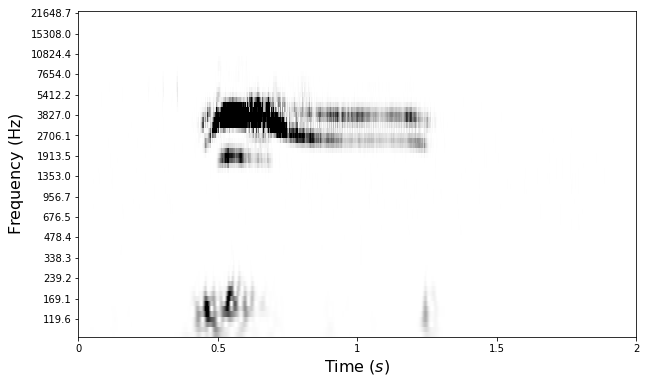

In [14]:
scal, times, freqs = make_scalogram(s,samplerate, pooling=1)

freqs = np.around(freqs,decimals=1)

myfig = plt.figure(figsize =(10,6))

font_dict = {'family': 'sans', 'color': 'black', 'weight': 'normal', 'size': 16 }
alignment = {'horizontalalignment': 'center', 'verticalalignment': 'baseline' }

# luminosity is for adjusting the contrast of the heatmap of the scalogram (used in imshow(...,vmax=...))
luminosity = 20 

plt.grid(False)
plt.imshow(scal, aspect='auto', cmap=plt.cm.gray_r, vmin = 0,vmax = np.max(scal)/luminosity)
plt.xticks([0,0.5*44100,1*44100,1.5*44100,2*44100], ('0', '0.5', '1', '1.5', '2'))
plt.yticks([0,4,8,12,16,20,24,28,32,36,40,44,48,52,56,60],freqs[0:64:4])
plt.xlabel('Time ($s$)', fontdict=font_dict)
plt.ylabel('Frequency ($\mathrm{Hz}$)', fontdict=font_dict)
plt.show()

myfig.savefig("roadside-hawk-scalogram.pdf", bbox_inches='tight')
myfig.savefig("roadside-hawk-scalogram.png", bbox_inches='tight')

## Figure 10

$$f(x) = \mathrm{softmax}\left( \left(\begin{array}{rr} -3 & -2 \\ -1 & 3 \\ 3 & -1 \end{array}\right) \left( \begin{array}{r} x_1 \\ x_2 \end{array} \right) + \left( \begin{array}{r} 6 \\ -6 \\ -3 \end{array} \right) \right)$$

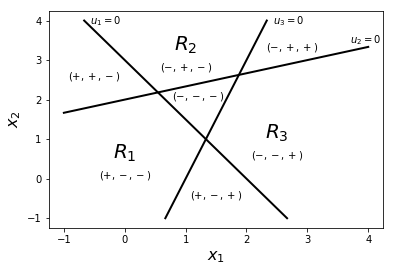

In [15]:
def softmax(u):
    s = np.sum(np.exp(u))
    return np.exp(u)/s

W = np.array([[-3,-2],[-1,3],[3,-1]])
b = np.array([6,-6,-3])

def f(x,W,b):
    #print(softmax(np.matmul(W,x)+b))
    return(np.argmax(softmax(np.matmul(W,x)+b))+1)

f(np.array([3,2]), W, b)

myfig = plt.figure()

font_dict = {'family': 'sans', 'color': 'black', 'weight': 'normal', 'size': 20 }
alignment = {'horizontalalignment': 'center', 'verticalalignment': 'baseline' }

font_dict2 = {'family': 'sans', 'color': 'black', 'weight': 'normal', 'size': 16 }

plt.plot([-2/3,8/3],[4,-1], color='black', linewidth=2.0) # 3x+2y=6
plt.text(-2/3+0.1, 4-0.1, r'$u_1=0$')

plt.plot([-1,4],[5/3,10/3], color='black', linewidth=2.0) # x-3y=-6
plt.text(4-0.3, 10/3+0.1, r'$u_2=0$')

plt.plot([2/3,7/3],[-1,4], color='black', linewidth=2.0) # 3x-y=3
plt.text(7/3+0.1, 4-0.1, r'$u_3=0$')

plt.text(0, 0.5,  r'$R_1$', fontdict=font_dict, **alignment)
plt.text(1, 3.25, r'$R_2$', fontdict=font_dict, **alignment)
plt.text(2.5, 1,  r'$R_3$', fontdict=font_dict, **alignment)

plt.text(0, 0, r'$(+,-,-)$', **alignment) # below R_1
plt.text(1, 2.75, r'$(-,+,-)$', **alignment) # below R_2
plt.text(2.5, 0.5, r'$(-,-,+)$', **alignment) # below R_3

plt.text(-0.5, 2.5, r'$(+,+,-)$', **alignment) # between R_1 and R_2
plt.text(2.75, 3.25, r'$(-,+,+)$', **alignment) # between R_2 and R_3
plt.text(1.5, -0.5, r'$(+,-,+)$', **alignment) # between R_1 and R_3

plt.text(1.2, 2, r'$(-,-,-)$', **alignment) # interior triangle

plt.xlabel('$x_1$', fontdict=font_dict2)
plt.ylabel('$x_2$', fontdict=font_dict2)
plt.show()

myfig.savefig("three-regions.pdf", bbox_inches='tight')
myfig.savefig("three-regions.png", bbox_inches='tight')

## Figure 11

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


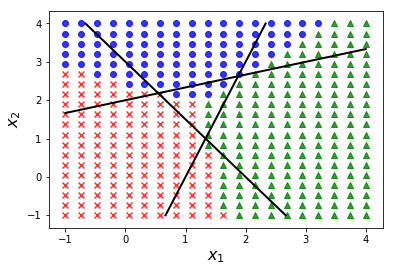

In [16]:
myfig = plt.figure()

font_dict = {'family': 'sans', 'color': 'black', 'weight': 'normal', 'size': 16 }
alignment = {'horizontalalignment': 'center', 'verticalalignment': 'baseline' }

markers = ('x','o','^')
colors = ('red','blue','green')
cmap = ListedColormap(colors)

# https://www.rapidtables.com/web/color/gray-color.html
#cmap = ListedColormap(['#DCDCDC','#808080','#2F4F4F']) # gainsboro, gray, darkslategray

Xlist = []
colorList = []
U = np.linspace(-1,4,20)
V = np.linspace(-1,4,20)
for x in U:
    for y in V:
        Xlist.append([x,y])
        colorList.append(f(np.array([x,y]),W,b))
Xlist = np.array(Xlist)
colorList = np.array(colorList)
for idx,c1 in enumerate(np.unique(colorList)):
    plt.scatter(x=Xlist[colorList == c1,0],y = Xlist[colorList == c1,1],alpha = 0.8, c = cmap(idx), marker = markers[idx], label = c1)
plt.plot([-2/3,8/3],[4,-1], color='black', linewidth=2.0) # 3x+2y=6
plt.plot([-1,4],[5/3,10/3], color='black', linewidth=2.0) # x-3y=-6
plt.plot([2/3,7/3],[-1,4], color='black', linewidth=2.0) # 3x-y=3
plt.xlabel('$x_1$', fontdict=font_dict)
plt.ylabel('$x_2$', fontdict=font_dict)
plt.show()

myfig.savefig("plane-division.pdf", bbox_inches='tight')
myfig.savefig("plane-division.png", bbox_inches='tight')

## Figure 12

This figure was generated by compiling the TikZ code below in QTikZ (to pdf for the book chapter and png for inclusion in this notebook).  You could just as easily wrap this TikZ code in a minimal (or standalone) documentclass, load the tikz package, and then compile using pdflatex.  

```
% filename: basic-nn.tikz

\tikzstyle{block} = [rectangle, draw, fill=blue!20, 
text width=2em, text centered,  minimum height=2.5em]
\tikzstyle{line} = [draw, -latex]
\begin{tikzpicture}[node distance = 4cm, auto]
% Place nodes
\node [label=above:Input,block] (init1) {\tiny$\bullet$};
\node [block, below of = init1] (init2) {\tiny$\bullet$};
\node [block, above right of=init1] (layer1) {\begin{tabular}{c}\tiny$\bullet$\\ \small 6\end{tabular}};
\node [block, below of=layer1] (layer2) {\begin{tabular}{c}\tiny$\bullet$\\ \small $-6$\end{tabular}};
\node [block, below of=layer2] (layer3) {\begin{tabular}{c}\tiny$\bullet$\\ \small $-3$\end{tabular}};
\node [label=above:Output,block, right of=layer1] (out1) {\tiny$\bullet$};
\node [block, below of = out1] (out2) {\tiny$\bullet$};
\node [block, below of = out2] (out3) {\tiny$\bullet$};
\path [line] (init1) -- node[text width=0.5cm,pos=0.7, above=0.2em]{\small $-3$}(layer1);
\path [line] (init1) -- node[text width=0.5cm,pos=0.8, above=0.05em]{\small $-1$}(layer2);
\path [line] (init1) -- node[text width=0.5cm,pos=0.9, above=0.8em]{\small $3$}(layer3);
\path [line] (init2) -- node[text width=0.5cm,pos=0.7, above=1em]{\small $-2$}(layer1);
\path [line] (init2) -- node[text width=0.5cm,pos=0.9, above=0.01em]{\small $3$}(layer2);
\path [line] (init2) -- node[text width=0.5cm,pos=0.8, above=0.15em]{\small $-1$}(layer3);
\path [line] (layer1) --  node [text width=2.5cm,pos=0.5,above=2.5em ] {$f_1=$ softmax}(out1);
\path [line] (layer1) -- (out2);
\path [line] (layer1) -- (out3);
\path [line] (layer2) --  (out1);
\path [line] (layer2) --  (out2);
\path [line] (layer2) --  (out3);
\path [line] (layer3) --  (out1);
\path [line] (layer3) --  (out2);
\path [line] (layer3) --  (out3);
\end{tikzpicture}
```

![basic one-layer neural network](basic-nn.png)

## Figure 13

This figure was generated by compiling the TikZ code below in QTikZ (to pdf for the book chapter and png for inclusion in this notebook).  You could just as easily wrap this TikZ code in a minimal (or standalone) documentclass, load the tikz package, and then compile using pdflatex.  

```
% two-layer-nn.tikz

\tikzstyle{block} = [rectangle, draw, fill=blue!20, 
text width=2em, text centered,  minimum height=2.5em]
\tikzstyle{line} = [draw, -latex]

\begin{tikzpicture}[node distance = 4cm, auto]
% Place nodes
\node [label=above:Input,block] (init1) {\tiny$\bullet$};
\node [block, below of = init1] (init2) {\tiny$\bullet$};
%\node [block, below of = init2] (init3) {\tiny$\bullet$};
\node [block, right of=init1] (layer2) {\tiny$\bullet$};
\node [block, above of=layer2] (layer1) {\tiny$\bullet$};
\node [block, below of=layer2] (layer3) {\tiny$\bullet$};
\node [block, below of=layer3] (layer4) {\tiny$\bullet$};
\node [label=above:Layer 1 Output,block, right of=layer1] (out1) {\tiny$\bullet$};
\node [block, below of = out1] (out2) {\tiny$\bullet$};
\node [block, below of = out2] (out3) {\tiny$\bullet$};
\node [block, below of = out3] (out4) {\tiny$\bullet$};
\node [block,below right of=out1] (layer21) {\tiny$\bullet$};
\node [block, below of = layer21] (layer22) {\tiny$\bullet$};
\node [block, below of = layer22] (layer23) {\tiny$\bullet$};
\node [label=above:Layer 2 Output,block, right of=layer21] (out21) {\tiny$\bullet$};
\node [block, right of=layer22] (out22) {\tiny$\bullet$};
\node [block, right of=layer23] (out23) {\tiny$\bullet$};
\path [line] (init1) -- node [text width=1cm,pos=0.5,above=0.5em ] {$L_1$}(layer1);
\path [line] (init1) -- (layer2);
\path [line] (init1) -- (layer3);
\path [line] (init1) -- (layer4);
\path [line] (init2) -- (layer1);
\path [line] (init2) -- (layer2);
\path [line] (init2) -- (layer3);
\path [line] (init2) -- (layer4);
%\path [line] (init3) -- (layer1);
%\path [line] (init3) -- (layer2);
%\path [line] (init3) -- (layer3);
%\path [line] (init3) -- (layer4);
%
\path [line] (layer1) --  node [text width=3cm,pos=0.55,above ] {$f_1=$ activation}(out1);
\path [line] (layer1) --  (out2);
\path [line] (layer1) --  (out3);
\path [line] (layer1) --  (out4);
%
\path [line] (layer2) --  (out1);
\path [line] (layer2) --  (out2);
\path [line] (layer2) --  (out3);
\path [line] (layer2) --  (out4);
%
\path [line] (layer3) --  (out1);
\path [line] (layer3) --  (out2);
\path [line] (layer3) --  (out3);
\path [line] (layer3) --  (out4);
%
\path [line] (layer4) --  (out1);
\path [line] (layer4) --  (out2);
\path [line] (layer4) --  (out3);
\path [line] (layer4) --  (out4);
%
\path [line] (out1) -- node [text width=1cm,pos=0.8,above=2em ] {$L_2$}(layer21);
\path [line] (out1) -- (layer22);
\path [line] (out1) -- (layer23);
\path [line] (out2) -- (layer21);
\path [line] (out2) -- (layer22);
\path [line] (out2) -- (layer23);
\path [line] (out3) -- (layer21);
\path [line] (out3) -- (layer22);
\path [line] (out3) -- (layer23);
\path [line] (out4) -- (layer21);
\path [line] (out4) -- (layer22);
\path [line] (out4) -- (layer23);
%
\path [line] (layer21) --  node [text width=3cm,pos=0.55,above ] {$f_2=$ activation}(out21);
\path [line] (layer21) --  (out22);
\path [line] (layer21) --  (out23);
%
\path [line] (layer22) --  (out21);
\path [line] (layer22) --  (out22);
\path [line] (layer22) --  (out23);
%
\path [line] (layer23) --  (out21);
\path [line] (layer23) --  (out22);
\path [line] (layer23) --  (out23);
\end{tikzpicture}
```

![alt text](two-layer-nn.png)

## Figure 14

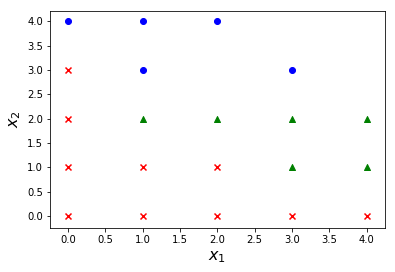

In [17]:
myfig = plt.figure()

font_dict = {'family': 'sans', 'color': 'black', 'weight': 'normal', 'size': 16 }
alignment = {'horizontalalignment': 'center', 'verticalalignment': 'baseline' }

X = np.array([[0,0],[2,2],[1,3],[2,4],[0,1],[3,1],[0,4],[1,1],[3,2],[2,1],[0,2],[3,3],
              [2,0],[3,0],[1,4],[1,0],[0,3],[4,2],[4,0],[4,1],[1,2]]).astype(float)
colorListOrig = np.array([1,3,2,2,1,3,2,1,3,1,1,2,1,1,2,1,1,3,1,3,3])

Y = X[colorListOrig == 3]
plt.scatter(Y[:,0],Y[:,1],color='green',marker='^')
Y = X[colorListOrig == 2]
plt.scatter(Y[:,0],Y[:,1],color='blue',marker='o')
Y = X[colorListOrig == 1]
plt.scatter(Y[:,0],Y[:,1],color='red',marker='x')
plt.xlabel('$x_1$', fontdict=font_dict)
plt.ylabel('$x_2$', fontdict=font_dict)
plt.show()

myfig.savefig("plane-scatterplot.pdf", bbox_inches='tight')
myfig.savefig("plane-scatterplot.png", bbox_inches='tight')

## Figure 15

Due to the random initialization of weights, the figure generated may be different each time the code is run.

In [18]:
def backprop(X,T,n,W,b,rate = 0.1):
    x = X[n]
    t = T[n]
    u = np.matmul(W,x)+b
    y = softmax(u)
    c = np.zeros([3]).astype(float)
    v = np.array([2*(y[0]-t[0]),2*(y[1]-t[1]),2*(y[2]-t[2])])
    M = np.array([[(y[0]-y[0]**2),-y[0]*y[1],-y[0]*y[2]],
                  [-y[1]*y[0],(y[1]-y[1]**2),-y[1]*y[2]],
                  [-y[0]*y[2],-y[1]*y[2],(y[2]-y[2]**2)]])

    c = np.dot(v,M)
    grad = np.array([x[0]*c[0],x[1]*c[0],x[0]*c[1],x[1]*c[1],x[0]*c[2],x[1]*c[2]
                     ,c[0],c[1],c[2]])
    return grad*rate

def error(X,T,W,b):
    err = 0.0
    for i in range(10):
        x = X[i]
        Y = softmax(np.matmul(W,x)+b)
        err += np.sum((Y-T[i])**2)/10
    return err

In [19]:
X = np.array([[0,0],[2,2],[1,3],[2,4],[0,1],[3,1],[0,4],[1,1],[3,2],[2,1],[0,2],[3,3],
              [2,0],[3,0],[1,4],[1,0],[0,3],[4,2],[4,0],[4,1],[1,2]]).astype(float)
colorListOrig = np.array([1,3,2,2,1,3,2,1,3,1,1,2,1,1,2,1,1,3,1,3,3])
n = len(colorListOrig)
T = np.array([np.identity(3)[colorListOrig[i]-1] for i in range(n)])
W = np.array([[ 0.5 , -0.5],[-0.5 , -0.5 ],[ 0.5 , 0.5]])
b = np.array([0,0,1]).astype(float)
print(error(X,T,W,b))

for e in range(10000):
    k = np.random.randint(n)
    r = 0.05
    g = backprop(X,T,k,W,b,r)
    Wc = g[:6].copy().reshape(3,2)
    bc = g[6:].copy().reshape(-1)
    W -= Wc
    b -= bc
    if e%200 == 0:
        print(error(X,T,W,b))

1.1377852111052753
1.1329330318499085
0.3957736466974511
0.3265796277507722
0.21136186032336046
0.29104809706846985
0.2719513228112562
0.25561164913597834
0.18364077385290015
0.17056966695363152
0.13739003209193837
0.1557223240691265
0.18245558447333562
0.1287362304170381
0.14721791899566322
0.1995570061663173
0.11624361471414962
0.15257268485816036
0.13034013819166307
0.15981291631215297
0.15712510682093422
0.13489767351768348
0.1273176043347205
0.1200650136374303
0.15448292857037513
0.11306831830352308
0.14864161277875518
0.11918215340474154
0.09221231472095376
0.10638403536054737
0.10585581021018234
0.1411130391091864
0.14100315205122813
0.09564020273339299
0.12653365274735043
0.07879947273934784
0.12040495507294847
0.09621805360281172
0.08759590286590824
0.1031142214569005
0.10472137660975911
0.09845270175824847
0.08490483700832918
0.11105071418019567
0.0895118241125803
0.07996059390774388
0.06757987976459894
0.08210330050742488
0.07089555721502733
0.07264427431802613
0.08367988095

In [20]:
def f_class(x,W,b):
    return np.argmax(softmax(np.matmul(W,x)+b))+1

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


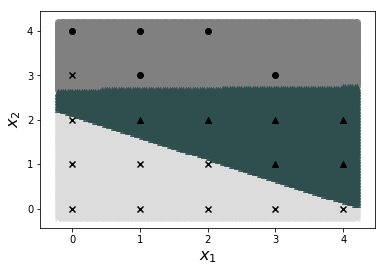

In [21]:
myfig = plt.figure()

font_dict = {'family': 'sans', 'color': 'black', 'weight': 'normal', 'size': 16 }
alignment = {'horizontalalignment': 'center', 'verticalalignment': 'baseline' }

markers = ('x','o','^')
colors = ('red','blue','green')
#cmap = ListedColormap(colors)

# https://www.rapidtables.com/web/color/gray-color.html
cmap = ListedColormap(['#DCDCDC','#808080','#2F4F4F']) # gainsboro, gray, darkslategray

Xlist = []
colorList = []
U = np.linspace(-0.2,4.2,130)
V = np.linspace(-0.2,4.2,130)
for x in U:
    for y in V:
        Xlist.append([x,y])
        colorList.append(f_class(np.array([x,y]),W,b))
Xlist = np.array(Xlist)
colorList = np.array(colorList)
for idx,c1 in enumerate(np.unique(colorList)):
    plt.scatter(x=Xlist[colorList == c1,0],y = Xlist[colorList == c1,1],alpha = 0.8, c = cmap(idx), marker = markers[idx], label = c1)
Y = X[colorListOrig == 3]
plt.scatter(Y[:,0],Y[:,1],color='black',marker='^')
Y = X[colorListOrig == 2]
plt.scatter(Y[:,0],Y[:,1],color='black',marker='o')
Y = X[colorListOrig == 1]
plt.scatter(Y[:,0],Y[:,1],color='black',marker='x')
plt.xlabel('$x_1$', fontdict=font_dict)
plt.ylabel('$x_2$', fontdict=font_dict)
plt.show()

myfig.savefig("plane-one-layer-nn.pdf", bbox_inches='tight')
myfig.savefig("plane-one-layer-nn.png", bbox_inches='tight')

#print(W,b)

## Figure 16

Due to the random initialization of weights, the figure generated may be different each time the code is run.

In [22]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Convolution1D, MaxPooling1D, Dropout, Flatten
from keras.callbacks import History
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras import regularizers

hidden_nodes1 = 4
#hidden1_act = 'softmax'
hidden1_act = 'relu'

model = Sequential()
model.add(Dense(hidden_nodes1, activation = hidden1_act,input_shape =(2,)))
model.add(Dense(3, activation = 'softmax'))
#model.compile(optimizer = 'SGD', loss ='mean_squared_error')
#keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer = 'adadelta', loss ='categorical_crossentropy', metrics =['accuracy'])
keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=1e-08)
model.summary() 

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 15        
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(x=X, y=T, epochs=5000, verbose=0)

Instructions for updating:
Use tf.cast instead.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


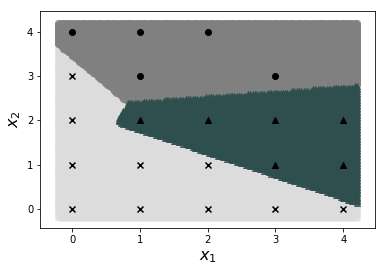

In [24]:
myfig = plt.figure()

font_dict = {'family': 'sans', 'color': 'black', 'weight': 'normal', 'size': 16 }
alignment = {'horizontalalignment': 'center', 'verticalalignment': 'baseline' }

markers = ('x','o','^')
colors = ('red','blue','green')
#cmap = ListedColormap(colors)

# https://www.rapidtables.com/web/color/gray-color.html
cmap = ListedColormap(['#DCDCDC','#808080','#2F4F4F']) # gainsboro, gray, darkslategray

Xlist = []
colorList = []
U = np.linspace(-0.2,4.2,130)
V = np.linspace(-0.2,4.2,130)
for x in U:
    for y in V:
        Xlist.append([x,y])
        colorList.append(np.argmax(model.predict(np.array([[x,y]]))))
        #print(np.argmax(model.predict(np.array([[x,y]]))))
Xlist = np.array(Xlist)
colorList = np.array(colorList)
for idx,c1 in enumerate(np.unique(colorList)):
    plt.scatter(x=Xlist[colorList == c1,0],y = Xlist[colorList == c1,1],alpha = 0.8, c = cmap(idx), marker = markers[idx], label = c1)
Y = X[colorListOrig == 3]
plt.scatter(Y[:,0],Y[:,1],color='black',marker='^')
Y = X[colorListOrig == 2]
plt.scatter(Y[:,0],Y[:,1],color='black',marker='o')
Y = X[colorListOrig == 1]
plt.scatter(Y[:,0],Y[:,1],color='black',marker='x')
plt.xlabel('$x_1$', fontdict=font_dict)
plt.ylabel('$x_2$', fontdict=font_dict)
plt.show()

myfig.savefig("plane-two-layer-nn.pdf", bbox_inches='tight')
myfig.savefig("plane-two-layer-nn.png", bbox_inches='tight')


## Figure 17

This figure was generated by compiling the TikZ code below in QTikZ (to pdf for the book chapter and png for inclusion in this notebook).  You could just as easily wrap this TikZ code in a minimal (or standalone) documentclass, load the tikz package, and then compile using pdflatex.  

```
% convolutional-neural-network.tikz


\begin{tikzpicture}[scale=0.125]

%\draw [-latex, very thick, gray] (0,25) -- node [above, black] {Feature Identification, Compression, and/or Abstraction of Data Representation} (136,25);

% input layer
\draw [thick] (-1,16) node[above right] {Scalogram};
\draw [thick] (0,0) rectangle (20,16);
\draw [thick, fill=gray] (0,11) rectangle (5,16);

% first layer: convolutional
\begin{scope}[shift = {(30,2)}]
\draw (-1,15) node[above right] {Convolutional};
\draw [thick] (0,0) rectangle (18,14);
\draw [shift = {(2,-2)}, fill=white, thick] (0,0) rectangle (18,14);
\draw [shift = {(4,-4)}, fill=white, thick] (0,0) rectangle (18,14);
\draw [shift = {(6,-6)}, fill=white, thick] (0,0) rectangle (18,14);
\draw [shift = {(0+6,14-6)}, fill=gray, thick] (0,0) rectangle (1,-1);
\draw [shift = {(6,-6)}, fill=gray, thick] (0,0) rectangle (2,2);
\end{scope}

% connect kernel on layer 0 with output on layer 1
\draw [thick, dotted] (5,11) -- (36,9);
\draw [thick, dotted] (5,16) -- (36,10);

% second layer: max pooling
\begin{scope}[shift = {(60,9)}]
\draw (-1,7) node[above right] {Maxpool};
\draw [thick] (0,0) rectangle (9,7);
\draw [shift = {(2,-2)}, fill=white, thick] (0,0) rectangle (9,7);
\draw [shift = {(4,-4)}, fill=white, thick] (0,0) rectangle (9,7);
\draw [shift = {(6,-6)}, fill=white, thick] (0,0) rectangle (9,7);

\draw [shift = {(6,1)}, fill=gray, thick] (0,0) rectangle (2,-2);
\draw [shift = {(6,-6)}, fill=gray, thick] (0,0) rectangle (1,1);
\end{scope}

% connect kernel on layer 1 with output on layer 2
\draw [thick, dotted] (38,-2) -- (66,4);
\draw [thick, dotted] (38,-4) -- (66,3);


% third layer: convolutional
\begin{scope}[shift = {(90,2)}]
\draw (-1,15) node[above right] {Convolutional};
\draw [shift = {(0,8)}, thick] (0,0) rectangle (8,6);
\draw [shift = {(2,8-2)}, fill=white, thick] (0,0) rectangle (8,6);
\draw [shift = {(4,8-4)}, fill=white, thick] (0,0) rectangle (8,6);
\draw [shift = {(6,8-6)}, fill=white, thick] (0,0) rectangle (8,6);
\draw [shift = {(8,8-8)}, fill=white, thick] (0,0) rectangle (8,6);
\draw [shift = {(10,8-10)}, fill=white, thick] (0,0) rectangle (8,6);
\draw [shift = {(12,8-12)}, fill=white, thick] (0,0) rectangle (8,6);

\draw [shift = {(12,8-7)}, fill=gray, thick] (0,0) rectangle (1,1);
\draw [shift = {(12,8-12)}, fill=gray, thick] (0,0) rectangle (3,3);
\end{scope}


% connect kernel on layer 2 with output on layer 3
\draw [thick, dotted] (68,10) -- (102,4);
\draw [thick, dotted] (68,8) -- (102,3);


% fourth layer: max pooling
\begin{scope}[shift = {(120,2)}]
\draw (-1,14) node[above right] {Maxpool};
\draw [shift = {(0,10)}, thick] (0,0) rectangle (4,3);
\draw [shift = {(2,10-2)}, fill=white, thick] (0,0) rectangle (4,3);
\draw [shift = {(4,10-4)}, fill=white, thick] (0,0) rectangle (4,3);
\draw [shift = {(6,10-6)}, fill=white, thick] (0,0) rectangle (4,3);
\draw [shift = {(8,10-8)}, fill=white, thick] (0,0) rectangle (4,3);
\draw [shift = {(10,10-10)}, fill=white, thick] (0,0) rectangle (4,3);
\draw [shift = {(12,10-12)}, fill=white, thick] (0,0) rectangle (4,3);
\draw [shift = {(12,10-12)}, fill=gray, thick] (0,0) rectangle (1,1);
\end{scope}

% connect kernel on layer 3 with output on layer 4
\draw [thick, dotted] (105,1) -- (132,1);
\draw [thick, dotted] (105,-2) -- (132,0);

% the flattening
\draw [-latex, very thick] (134,-3) -- (134,-10) -- node[above] {Flatten} (0,-10) -- (0,-47.5) -- (5,-47.5);


\draw (20,-20) node {Affine};
\draw (44,-17) node {Activation};
\draw (68,-25) node {Affine};
\draw (88,-35) node {Softmax};
\draw (102,-35) node [right] {Output};
\draw (102,-40.5) node [right] {Species 1 probability};
\draw (102,-45.5) node [right] {Species 2 probability};
\draw (102,-50.5) node [right] {Species 3 probability};
\draw (102,-55.5) node [right] {Species 4 probability};

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%  densely connected layers


\begin{scope}[shift={(10,-70)},scale=5]
\def\nZero{8} % number of nodes in layer 0
\def\nOne{12} % number of nodes in layer 1
\def\nTwo{\nOne} % number of nodes in layer 2
\def\nThree{4}
\def\nFour{4}
\def\spacebetweenlayers{4.5}

%\draw (2,11) node [below] {\Large Affine};
%\draw (6,11) node [below] {\Large Activation};
%\draw (10,11) node [below] {\Large Affine};
%\draw (14,11) node [below, text width=3cm] {\Large Softmax Activation};


% lines connecting layer 0 to layer 1
\foreach \x in {1,...,\nZero}{
	\foreach \y in {1,...,\nOne}{
		\draw (0,\x) -- (1*\spacebetweenlayers,\y-2);
	}
}

% lines connecting layer 1 to layer 2
\foreach \x in {1,...,\nOne}{
	\foreach \y in {1,...,\nTwo}{
		\draw (1*\spacebetweenlayers,\x-2) -- (2*\spacebetweenlayers,\y-2);
	}
}

% lines connecting layer 2 to layer 3
\foreach \x in {1,...,\nTwo}{
	\foreach \y in {1,...,\nThree}{
		\draw (2*\spacebetweenlayers,\x-2) -- (3*\spacebetweenlayers,\y+2);
	}
}

% lines connecting layer 2 to layer 3
\foreach \x in {1,...,\nThree}{
	\foreach \y in {1,...,\nFour}{
		\draw (3*\spacebetweenlayers,\x+2) -- (4*\spacebetweenlayers,\y+2);
	}
}

% layer 0
\foreach \x in {1,...,\nZero}{
	\draw [fill=gray] (0,\x) circle [radius=0.2];
}

% layer 1
\foreach \n in {1,...,\nOne}{
	\draw [fill=gray] (1*\spacebetweenlayers,\n-2) circle [radius=0.2];
}

% layer 2
\foreach \n in {1,...,\nTwo}{
	\draw [fill=gray] (2*\spacebetweenlayers,\n-2) circle [radius=0.2];
}

% layer 3
\foreach \n in {1,...,\nThree}{
	\draw [fill=gray] (3*\spacebetweenlayers,\n+2) circle [radius=0.2];
}

% layer 4
\foreach \n in {1,...,\nFour}{
	\draw [fill=gray] (4*\spacebetweenlayers,\n+2) circle [radius=0.2];
	%\draw (4*\spacebetweenlayers+0.5,7-\n) node [right] {\Large Bird \n};
}

\end{scope}

\end{tikzpicture}
```

![alt text](convolutional-neural-network.png)

## Figure 18

This figure was generated by compiling the TikZ code below in QTikZ (to pdf for the book chapter and png for inclusion in this notebook).  You could just as easily wrap this TikZ code in a minimal (or standalone) documentclass, load the tikz package, and then compile using pdflatex.  

```
% main-cnn.tikz

\tikzstyle{block} = [rectangle, draw, fill=white!20, 
text width=6em, text centered,  minimum height=2.5em]
\tikzstyle{line} = [draw, -latex]

\begin{tikzpicture}[node distance = 3.5cm, auto]
\node [block] (init1) {Input: Scalogram};		
\node [block, right of = init1] (init2) {$9\times 9$ Conv2D, 16 Channels, ReLU};
\node [block, right of = init2] (init3) {$4\times 4$ Max-pooling};
\node [block, right of=init3] (init4) {$3 \times 3$ Conv2D, 16 Channels, ReLU};
\node [block, right of=init4] (init5) {$4\times 4$ Max-pooling};		
\node [block, below of = init1] (init6) {Dense~Layer, 100 Nodes, ReLU};		
\node [block, right of = init6] (init7) {Dense~Layer, 100 Nodes, ReLU};		
\node [block, right of = init7] (init8) {Output: Dense~Layer, 4 Nodes, Softmax};		
\path [line] (init1) -- (init2);
\path [line] (init2) -- (init3);
\path [line] (init3) -- (init4);
\path [line] (init4) -- (init5);
\path [line] (init5.south) -- node [sloped, above] {flatten} (init6.north);
\path [line] (init6) -- (init7);
\path [line] (init7) -- (init8);
\end{tikzpicture}
```

![alt text](main-cnn.png)

## Session Information for Reproducible Research

In [25]:
import time
print(time.strftime("%Y-%m-%d %H:%M"))

2019-03-06 10:14


In [26]:
import IPython
print(IPython.sys_info())

{'commit_hash': '2e1cca5bc',
 'commit_source': 'installation',
 'default_encoding': 'UTF-8',
 'ipython_path': '/home/paul/anaconda3/envs/tf-cpu-conda/lib/python3.6/site-packages/IPython',
 'ipython_version': '7.3.0',
 'os_name': 'posix',
 'platform': 'Linux-4.15.0-36-generic-x86_64-with-debian-buster-sid',
 'sys_executable': '/home/paul/anaconda3/envs/tf-cpu-conda/bin/python',
 'sys_platform': 'linux',
 'sys_version': '3.6.8 |Anaconda, Inc.| (default, Dec 30 2018, 01:22:34) \n'
                '[GCC 7.3.0]'}


In [27]:
!conda list

# packages in environment at /home/paul/anaconda3/envs/tf-cpu-conda:
#
# Name                    Version                   Build  Channel
_tflow_select             2.3.0                       mkl  
absl-py                   0.7.0                    py36_0  
astor                     0.7.1                    py36_0  
backcall                  0.1.0                    py36_0  
blas                      1.0                         mkl  
bleach                    3.1.0                    py36_0  
c-ares                    1.15.0               h7b6447c_1  
ca-certificates           2019.1.23                     0  
certifi                   2018.11.29               py36_0  
decorator                 4.3.2                    py36_0  
entrypoints               0.3                      py36_0  
gast                      0.2.2                    py36_0  
gmp                       6.1.2                h6c8ec71_1  
grpcio                    1.16.1           py36hf8bcb03_1  
h5py                  

In [28]:
%who

Axes3D	 Conv2D	 Convolution1D	 Dense	 Dropout	 Flatten	 History	 IPython	 Im_convolve	 
Im_convolve_vectorized	 Im_integrand	 Im_z	 K	 ListedColormap	 MaxPooling1D	 MaxPooling2D	 N	 Re_convolve	 
Re_convolve_vectorized	 Re_integrand	 Re_z	 Sequential	 T	 U	 V	 W	 Wc	 
X	 Xlist	 Y	 a	 alignment	 ax	 axisEqual3D	 b	 backprop	 
bc	 c1	 cmap	 colorList	 colorListOrig	 colors	 convolve	 convolve_vectorized	 cv	 
e	 error	 f	 f_class	 fig	 font_dict	 font_dict2	 freqs	 g	 
gxcor	 h	 hidden1_act	 hidden_nodes1	 hxcor	 idx	 integrand	 k	 k_integrand	 
keras	 luminosity	 make_scalogram	 markers	 model	 morlet_imag	 morlet_real	 myfig	 n	 
num_samples	 omega0	 power_unnormalized	 psi	 quad	 r	 regularizers	 s	 samplerate	 
scal	 signal	 softmax	 t	 tau	 times	 wav	 x	 xcor	 
y	 


## Copyright

Copyright 2019 Russell Houpt, Mark Pearson, Paul Pearson, Taylor Rink, Sarah Seckler, Darin Stephenson, and Allison VanderStoep. All rights reserved.